This project is about to figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. 
Set each bank to be a seperate dataframe, with the variable name for that bank being its ticker symbol. This will invole a few steps:

1. Use dataframe to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
3. Figure out how to use datareader to grab info on the stock.

In [35]:
import yfinance as yf
import datetime


start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2025, 1, 1)

BAC = yf.download("BAC", start=start, end=end)
print(BAC.head())

/var/folders/5c/qq0xxrwj4t52gws0b9nfcmv40000gn/T/ipykernel_97765/3929333679.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  BAC = yf.download("BAC", start=start, end=end)
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker            BAC        BAC        BAC        BAC        BAC
Date                                                             
2010-01-04  12.232429  12.279207  11.788038  11.881594  180845200
2010-01-05  12.630041  12.637836  12.240224  12.271410  209521300
2010-01-06  12.778172  12.895119  12.497506  12.637838  205257900
2010-01-07  13.199176  13.401880  12.871730  13.004268  320868400
2010-01-08  13.082227  13.331709  12.965281  13.238152  220104700


In [36]:
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime
%matplotlib inline



In [37]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

In [38]:
BAC = data.DataReader("BAC", 'stooq', start, end)
# CitiGroup
C = data.DataReader("C", 'stooq', start, end)
# Goldman Sachs
GS = data.DataReader("GS", 'stooq', start, end)
# JPMorgan Chase
JPM = data.DataReader("JPM", 'stooq', start, end)
# Morgan Stanley
MS = data.DataReader("MS", 'stooq', start, end)
# Wells Fargo
WFC = data.DataReader("WFC", 'stooq', start, end)

In [39]:
MS

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-31,26.6023,26.9300,26.4865,26.5229,9.773893e+06
2015-12-30,27.0998,27.2194,26.8476,26.8721,6.065510e+06
2015-12-29,27.0448,27.2656,26.9506,27.1380,7.661993e+06
2015-12-28,26.9820,26.9820,26.6377,26.8211,6.501028e+06
2015-12-24,27.1547,27.2734,27.0448,27.0811,3.356089e+06
...,...,...,...,...,...
2006-01-09,38.4470,38.8846,38.4412,38.8120,5.246244e+06
2006-01-06,38.5432,38.5922,38.0703,38.4108,8.721337e+06
2006-01-05,38.2675,38.4264,38.0448,38.3715,7.313990e+06


In [40]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

In [41]:
bank_stocks.head()

BAC                                                 C  \
               Open     High      Low    Close        Volume     Open   
Date                                                                    
2006-01-03  39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04  39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05  39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06  39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09  39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

                                                     ...       MS           \
               High      Low    Close        Volume  ...     Open     High   
Date                                                 ...                     
2006-01-03  408.615  398.112  407.891  1.858097e+06  ...  37.4934  38.3558   
2006-01-04  406.325  400.089  400.354  2.260921e+06  ...  38.4971  38.8778   
2006-01-05  403.663  400.520  402.321  1.371893e+06  ...  38.2675  38.4264   
2006-01-06  404.641  398.865  402.321  1.655812e+06  ...  38.5432  38.5922   
2006-01-09  403.329  399.678  400.432  2.031072e+06  ...  38.4470  38.8846   

                                                WFC                    \
                Low    Close        Volume     Open     High      Low   
Date                                                                    
2006-01-03  37.2060  38.2361  6.806387e+06  22.7430  23.0144  22.4559   
2006-01-04  38.2675  38.2675  1.009857e+07  22.8831  22.8979  22.5683   
2006-01-05  38.0448  38.3715  7.313990e+06  22.6690  22.7055  22.5308   
2006-01-06  38.0703  38.4108  8.721337e+06  22.7302  22.8643  22.5920   
2006-01-09  38.4412  38.8120  5.246244e+06  22.7983  22.8979  22.7055   

                                   
              Close        Volume  
Date                               
2006-01-03  22.9581  1.530724e+07  
2006-01-04  22.6917  1.510382e+07  
2006-01-05  22.6690  1.407726e+07  
2006-01-06  22.7983  1.167705e+07  
2006-01-09  22.7983  7.808415e+06  

[5 rows x 30 columns]

In [42]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']

In [43]:
bank_stocks.head()

Bank Ticker      BAC                                                 C  \
Stock Info      Open     High      Low    Close        Volume     Open   
Date                                                                     
2006-01-03   39.4871  39.7023  38.8390  39.6217  1.936396e+07  405.492   
2006-01-04   39.5549  39.7592  39.0904  39.2004  2.110031e+07  404.358   
2006-01-05   39.2004  39.4126  38.9834  39.2525  1.761312e+07  400.843   
2006-01-06   39.3850  39.4774  39.0089  39.1917  1.496529e+07  404.504   
2006-01-09   39.3182  39.5294  39.0158  39.2181  1.855918e+07  402.174   

Bank Ticker                                           ...       MS           \
Stock Info      High      Low    Close        Volume  ...     Open     High   
Date                                                  ...                     
2006-01-03   408.615  398.112  407.891  1.858097e+06  ...  37.4934  38.3558   
2006-01-04   406.325  400.089  400.354  2.260921e+06  ...  38.4971  38.8778   
2006-01-05   403.663  400.520  402.321  1.371893e+06  ...  38.2675  38.4264   
2006-01-06   404.641  398.865  402.321  1.655812e+06  ...  38.5432  38.5922   
2006-01-09   403.329  399.678  400.432  2.031072e+06  ...  38.4470  38.8846   

Bank Ticker                                      WFC                    \
Stock Info       Low    Close        Volume     Open     High      Low   
Date                                                                     
2006-01-03   37.2060  38.2361  6.806387e+06  22.7430  23.0144  22.4559   
2006-01-04   38.2675  38.2675  1.009857e+07  22.8831  22.8979  22.5683   
2006-01-05   38.0448  38.3715  7.313990e+06  22.6690  22.7055  22.5308   
2006-01-06   38.0703  38.4108  8.721337e+06  22.7302  22.8643  22.5920   
2006-01-09   38.4412  38.8120  5.246244e+06  22.7983  22.8979  22.7055   

Bank Ticker                         
Stock Info     Close        Volume  
Date                                
2006-01-03   22.9581  1.530724e+07  
2006-01-04   22.6917  1.510382e+07  
2006-01-05   22.6690  1.407726e+07  
2006-01-06   22.7983  1.167705e+07  
2006-01-09   22.7983  7.808415e+06  

[5 rows x 30 columns]

In [44]:
bank_stocks['BAC']['Close'].max()

46.2013

In [45]:
for tick in tickers:
    print(tick, bank_stocks[tick]['Close'].max())


BAC 46.2013
C 466.812
GS 203.691
JPM 57.1634
MS 58.5624
WFC 47.0925


In [46]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     46.2013
C      466.8120
GS     203.6910
JPM     57.1634
MS      58.5624
WFC     47.0925
dtype: float64

In [47]:
returns = pd.DataFrame()
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()

/var/folders/5c/qq0xxrwj4t52gws0b9nfcmv40000gn/T/ipykernel_97765/2862447002.py:3: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()


In [48]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018478,-0.013704,-0.014304,0.000821,-0.011604
2006-01-05,0.001329,0.004913,-0.000364,0.003130,0.002718,-0.001000
2006-01-06,-0.001549,0.000000,0.013995,0.007061,0.001024,0.005704
2006-01-09,0.000674,-0.004695,0.012026,0.016240,0.010445,0.000000


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt


/Users/kc/Desktop/Machine-Learning-Approach-Session/venv/lib/python3.13/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/kc/Desktop/Machine-Learning-Approach-Session/venv/lib/python3.13/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/kc/Desktop/Machine-Learning-Approach-Session/venv/lib/python3.13/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/kc/Desktop/Machine-Learning-Approach-Session/venv/lib/python3.13/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/kc/Desktop/Machine-Learning-Approach-Session/venv/lib/python3.13/site-packages/seaborn/axisgrid.py:1513: User

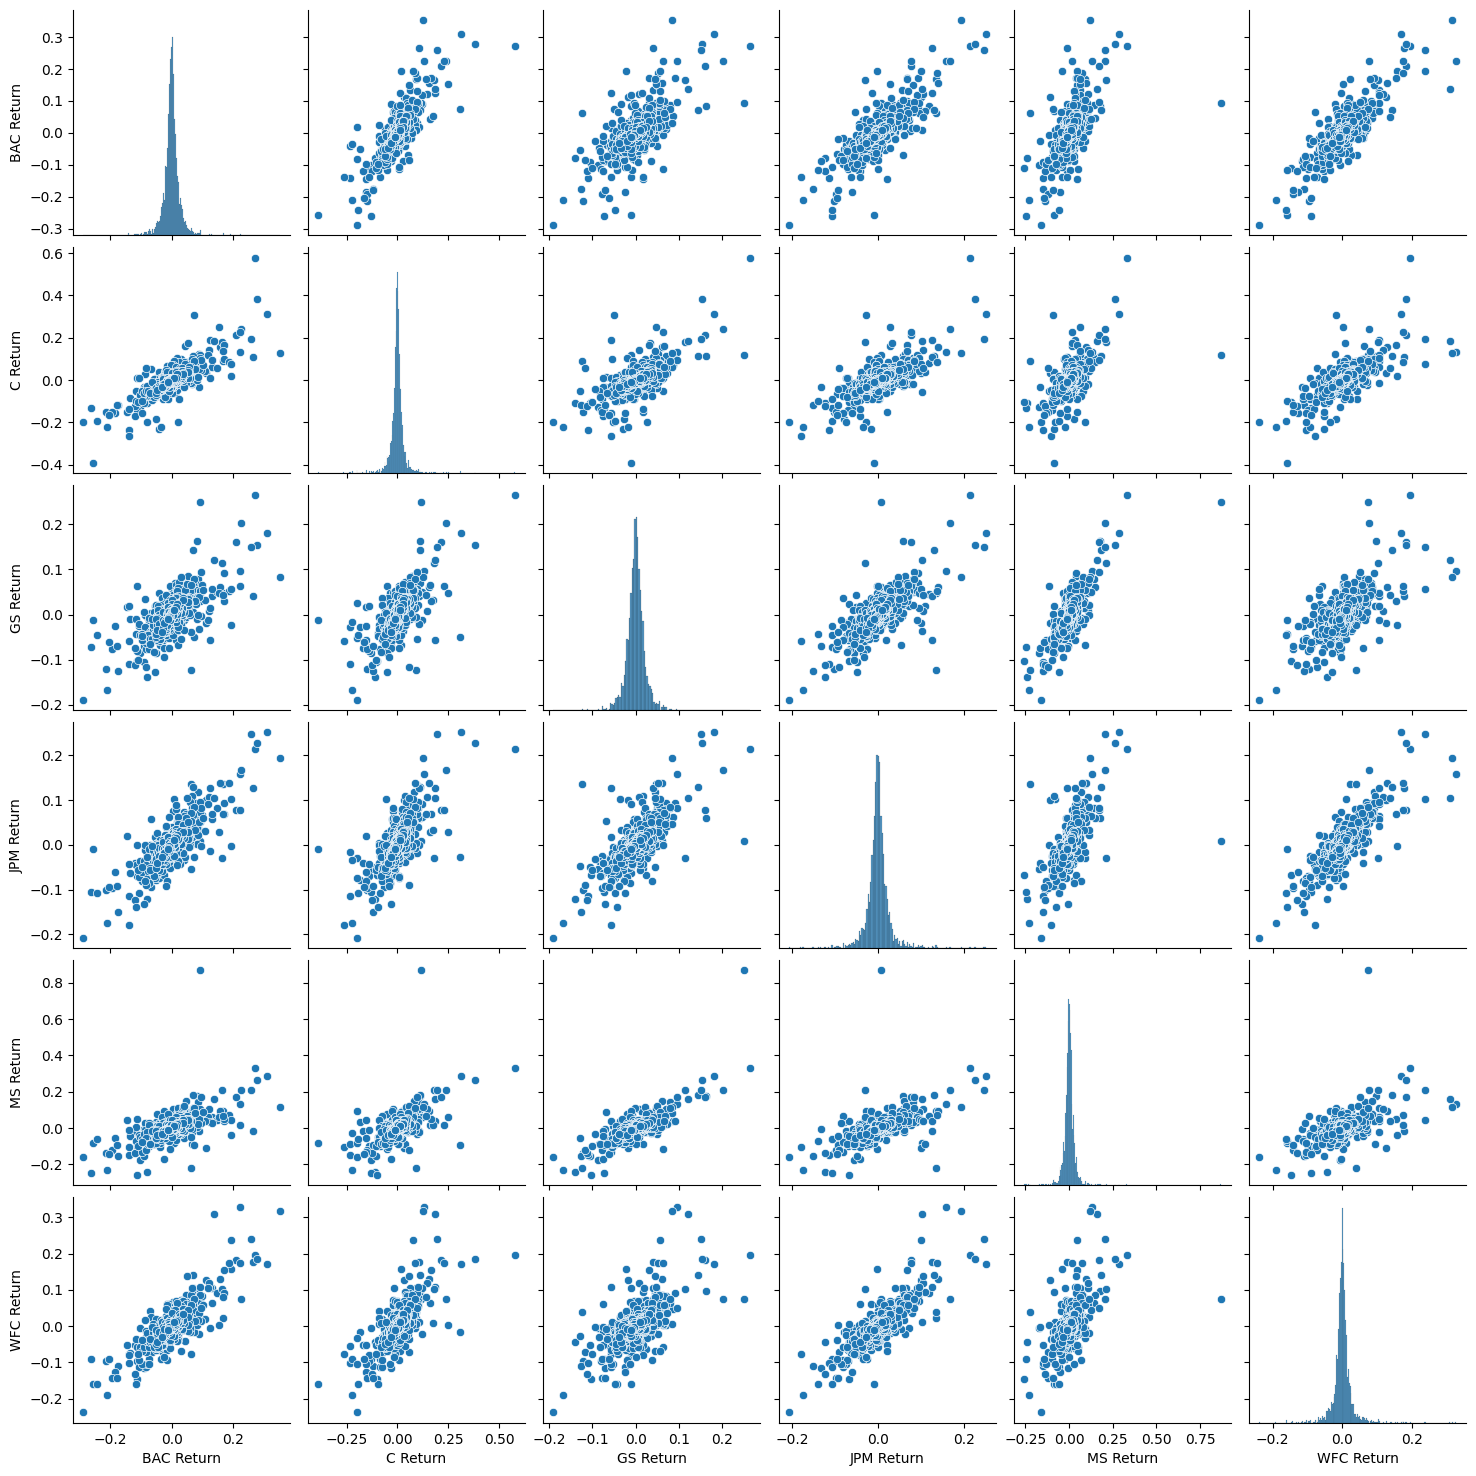

In [50]:
sns.pairplot(returns[1:],palette='coolwarm')
plt.savefig('pairplot.png')

In [51]:
returns['BAC Return'].argmin()

766

In [52]:
pos = returns['BAC Return'].argmin()
date = returns.index[pos]
date


Timestamp('2009-01-20 00:00:00')

In [53]:
returns.idxmin()


BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [54]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [55]:
returns.std()

BAC Return    0.036605
C Return      0.038615
GS Return     0.025371
JPM Return    0.027670
MS Return     0.037708
WFC Return    0.030221
dtype: float64

In [56]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010633,-0.018478,-0.013704,-0.014304,0.000821,-0.011604
2006-01-05,0.001329,0.004913,-0.000364,0.003130,0.002718,-0.001000
2006-01-06,-0.001549,0.000000,0.013995,0.007061,0.001024,0.005704
2006-01-09,0.000674,-0.004695,0.012026,0.016240,0.010445,0.000000


In [57]:
returns.std()

BAC Return    0.036605
C Return      0.038615
GS Return     0.025371
JPM Return    0.027670
MS Return     0.037708
WFC Return    0.030221
dtype: float64

In [58]:
returns.loc['2015-01-01':'2015-12-31'].std()

BAC Return    0.016149
C Return      0.015280
GS Return     0.014028
JPM Return    0.013964
MS Return     0.016006
WFC Return    0.012545
dtype: float64

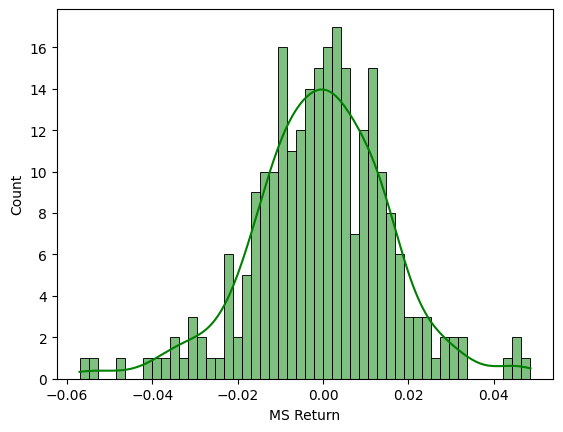

In [59]:
sns.histplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], kde=True,bins=50,color='green')
plt.savefig('histogram.png')

<Axes: xlabel='MS Return', ylabel='Count'>

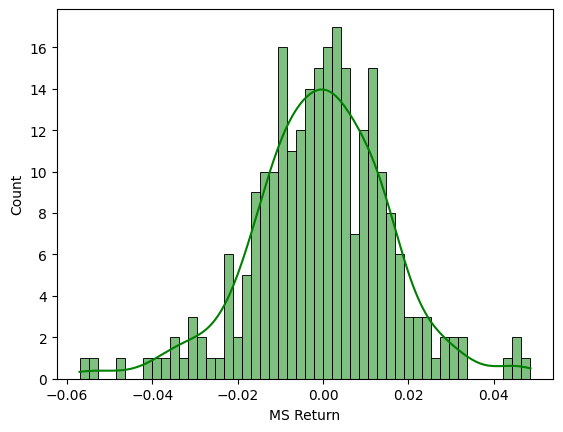

In [60]:
sns.histplot(returns.loc['2015-01-01':'2015-12-31']['MS Return'], bins=50, color='green', kde=True)

<Axes: xlabel='C Return', ylabel='Count'>

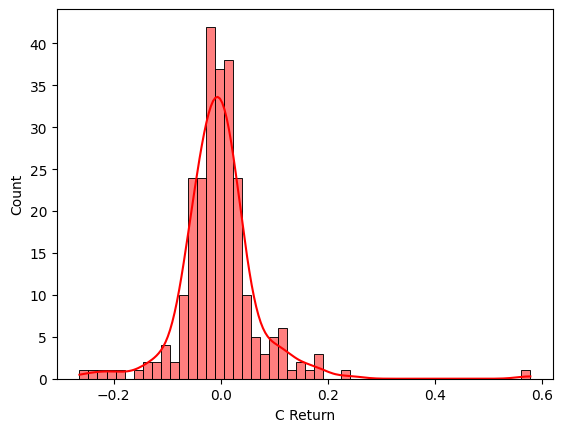

In [61]:
sns.histplot(returns.loc['2008-01-01':'2008-12-31']['C Return'], bins=50, color='red', kde=True)

In [62]:
import plotly as py
import cufflinks as cf
sns.set_style('whitegrid')
cf.go_offline()


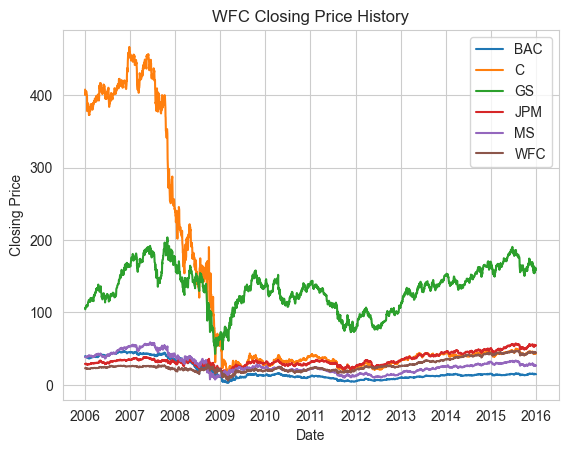

<Figure size 640x480 with 0 Axes>

In [63]:
for tick in tickers:
    sns.lineplot(data=bank_stocks[tick]['Close'],label=tick)
    plt.legend()
    plt.title(f'{tick} Closing Price History')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')



plt.show()
plt.savefig('closing price history.png')


In [64]:
bank_stocks.xs(key='Close', axis=1, level='Stock Info').iplot()
plt.savefig('interactive plot.png')

/Users/kc/Desktop/Machine-Learning-Approach-Session/venv/lib/python3.13/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



<Figure size 640x480 with 0 Axes>

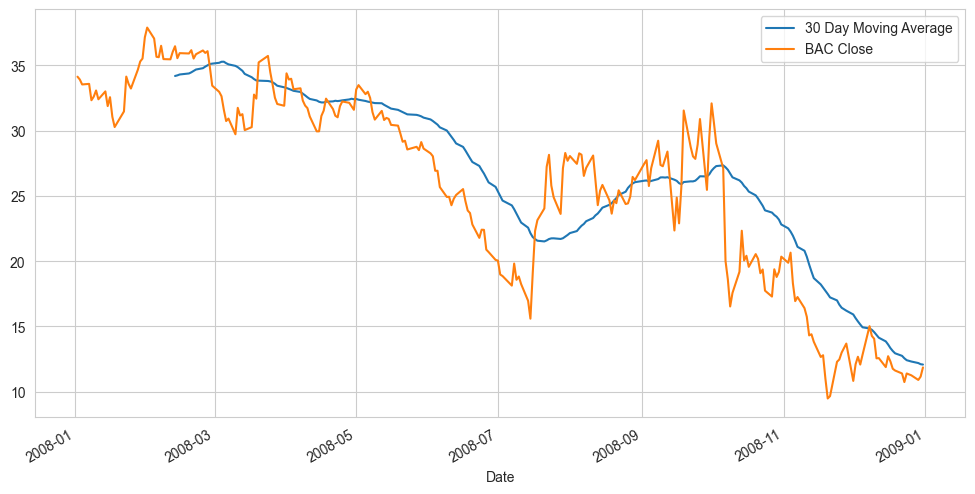

In [65]:
plt.figure(figsize=(12,6))
BAC = BAC.sort_index()
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Moving Average')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC Close')
plt.legend()


<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

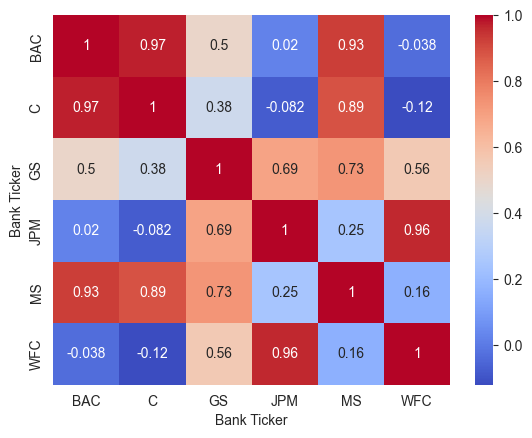

In [66]:
sns.heatmap(bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr(), annot=True, cmap='coolwarm')


In [67]:
close_corr = bank_stocks.xs(key='Close', axis=1, level='Stock Info').corr()
close_corr

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Bank Ticker,,,,,,
BAC,1.000000,0.970862,0.499725,0.019835,0.927576,-0.038152
C,0.970862,1.000000,0.376065,-0.081897,0.888668,-0.121581
GS,0.499725,0.376065,1.000000,0.691696,0.729949,0.557882
JPM,0.019835,-0.081897,0.691696,1.000000,0.245861,0.961907
MS,0.927576,0.888668,0.729949,0.245861,1.000000,0.159574
WFC,-0.038152,-0.121581,0.557882,0.961907,0.159574,1.000000


In [68]:
BAC

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,39.4871,39.7023,38.8390,39.6217,1.936396e+07
2006-01-04,39.5549,39.7592,39.0904,39.2004,2.110031e+07
2006-01-05,39.2004,39.4126,38.9834,39.2525,1.761312e+07
2006-01-06,39.3850,39.4774,39.0089,39.1917,1.496529e+07
2006-01-09,39.3182,39.5294,39.0158,39.2181,1.855918e+07
...,...,...,...,...,...
2015-12-24,15.0495,15.1035,14.9630,15.0063,3.380344e+07
2015-12-28,14.9630,14.9720,14.7539,14.8846,4.803435e+07
2015-12-29,14.9897,15.0780,14.9130,15.0131,5.251059e+07


In [82]:
bac15 = BAC[['Open','High','Low','Close','Volume']].loc['2015-01-01':'2015-12-31']
bac15.iplot(kind='candle', title='BAC Candlestick Chart')
plt.savefig('candlestick chart.png')

<Figure size 640x480 with 0 Axes>

In [81]:
MS = MS.sort_index() 
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma', periods=[13,21,55], title='MS Simple Moving Averages')
plt.savefig('MS simple moving averages.png')

/Users/kc/Desktop/Machine-Learning-Approach-Session/venv/lib/python3.13/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



<Figure size 640x480 with 0 Axes>

In [80]:
BAC = BAC.sort_index() 
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')
plt.savefig('BAC Bollinger Bands.png')

/Users/kc/Desktop/Machine-Learning-Approach-Session/venv/lib/python3.13/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.

/Users/kc/Desktop/Machine-Learning-Approach-Session/venv/lib/python3.13/site-packages/cufflinks/plotlytools.py:117: FutureWarning:

DatetimeIndex.format is deprecated and will be removed in a future version. Convert using index.astype(str) or index.map(formatter) instead.



<Figure size 640x480 with 0 Axes>